In [5]:
import numpy as np
import sympy as sym
from sympy.abc import x, a
import matplotlib.pyplot as plt

In [6]:
def forward_recur(a, n):
    if n == 0:
        return float(sym.integrate(1/(x+a),(x,0,1)))
    return 1/n - a*forward_recur(a, n-1)

In [7]:
def backward_recur(a, n):
    if n == 50:
        return 0
    else:
        return (1/(a*(n+1)) - 1/a*backward_recur(a, n+1))
    

In [8]:
vars = (10, 0.1) 
for a in vars:
    sym_res = float(sym.integrate(x**25/(x+a),(x,0,1)))
    print('Вычисления I25 при a =', a)
    print('Вычисления sympy:', sym_res)
    print('Прямая рекурсия:', forward_recur(a, 25))
    print('Обратная рекурсия:', backward_recur(a, 25))
    print('')

Вычисления I25 при a = 10
Вычисления sympy: 0.0035083534096819772
Прямая рекурсия: -82212552.62629618
Обратная рекурсия: 0.0035083534096819772

Вычисления I25 при a = 0.1
Вычисления sympy: 0.036226970909116835
Прямая рекурсия: 0.03622697090911682
Обратная рекурсия: 1.814821271954307e+23



In [9]:
from scipy.constants import G 

def F(m1,m2,r):
    return G*m1*m2/r**2

m1=40e4
m2=30e4
r=3.2
e1=0.05e4
e2=0.1e4
e3=0.01

In [10]:
f = F(m1,m2,r)
f

0.7821445312499998

In [11]:
import math

s=math.sqrt((G*m2/r**2*e1)**2+(G*m1/r**2*e2)**2+(-2*G*m1*m2/r**3*e3)**2)
s

0.005625795008537251

In [12]:
from numpy.random import default_rng

rng = default_rng(12345)

m1_rand = rng.normal(m1, e1, 100000)
m2_rand = rng.normal(m2, e2, 100000)
r_rand = rng.normal(r, e3, 100000)

f_rand=F(m1_rand, m2_rand, r_rand)
f_rand.shape

(100000,)

(array([1.7000e+01, 4.2500e+02, 3.5970e+03, 1.4483e+04, 2.9431e+04,
        3.0713e+04, 1.6069e+04, 4.5600e+03, 6.4900e+02, 5.6000e+01]),
 array([0.75809593, 0.76284378, 0.76759162, 0.77233947, 0.77708732,
        0.78183516, 0.78658301, 0.79133085, 0.7960787 , 0.80082654,
        0.80557439]),
 <BarContainer object of 10 artists>)

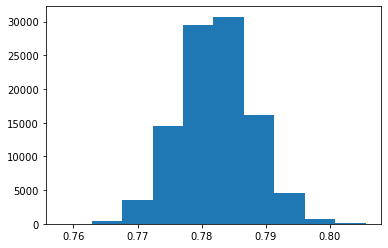

In [13]:
plt.hist(f_rand)

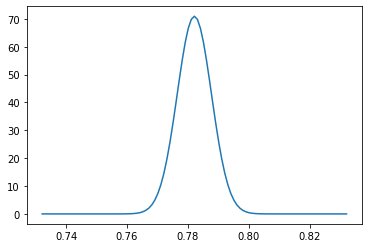

In [14]:
from scipy.stats import norm

x_axis = np.arange(f-0.05, f+0.05, 0.001)
plt.plot(x_axis, norm.pdf(x_axis,f,s))
plt.show()

In [15]:
m1=40e4
m2=30e4
r=3.2
e1=2e4
e2=10e4
e3=1. 

In [16]:
f = F(m1,m2,r)
f 

0.7821445312499998

In [17]:
s=math.sqrt((G*m2/r**2*e1)**2+(G*m1/r**2*e2)**2+(-2*G*m1*m2/r**3*e3)**2)
s

0.5553975829452449

In [18]:
m1_rand = rng.normal(m1, e1, 100000)
m2_rand = rng.normal(m2, e2, 100000)
r_rand = rng.normal(r, e3, 100000)

f_rand=F(m1_rand, m2_rand, r_rand)
f_rand.shape

(100000,)

(array([9.9998e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1.15959059e+00,  7.27821015e+04,  1.45565363e+05,  2.18348624e+05,
         2.91131885e+05,  3.63915146e+05,  4.36698407e+05,  5.09481668e+05,
         5.82264929e+05,  6.55048190e+05,  7.27831451e+05]),
 <BarContainer object of 10 artists>)

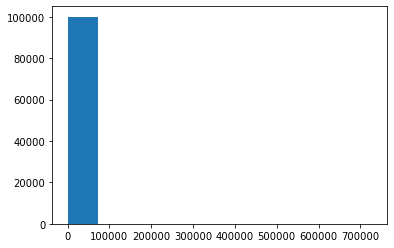

In [19]:
plt.hist(f_rand)

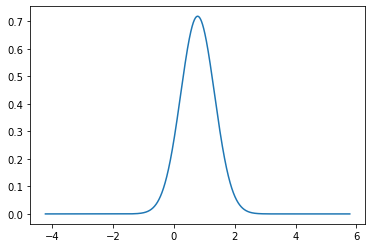

In [20]:
x_axis = np.arange(f-5, f+5, 0.001)
plt.plot(x_axis, norm.pdf(x_axis,f,s)) # генерируем норм распределение с вычисленными f, s
plt.show()